<a href="https://colab.research.google.com/github/hiiambobby/Chemical-Equation_With_Matrix/blob/main/LA_PHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra Practical Homework 2:

The following assignment consists of:
1. Implementation of elementary row operations : Scaling, Replacement, Interchange
2. Using the defined functions to find the answer of a system
3. Calculation of the determinant
4. EXTRA - Plotting the answer

TAs in charge: @ayrozz , @alijahan890

Please fill in the following information:

- Student: [Saba Seyed tabaei]
- Student ID: [40123042]

# How to complete this notebook?
To complete this notebook you just need to change the parts of code that is marked by comment `#CHNAGE THIS PART`. Please do not change cells that contains comment `# DO NOT CHANGE THIS CELL`. These cells are for evaluating your implementation.

# Attention!
 - You are free to add, remove or edit each cell in any way you desire.
 - We strongly recommend you to observe the default order of different parts of this file.
 - NO PREDEFINED BUILT-IN FUNCTION OF EXTERNAL LIBRARIES SUCH AS NUMPY IS ALLOWED!

### 0. Libraries

In [778]:
import time
import matplotlib.pyplot as plt
import numpy as np

row_switches = 0

## 1. Implementation of elementary row operations
Implement these operations from scratch, for they will be used for upcoming sections


### 1.1. Scaling

In [779]:
def op_scale(A, R, C):
    #CHNAGE THIS PART
    """ Multiply the R-th row of the matrix A by C, and return the new matrix """
    R -= 1
    A[R] *= C
    #print(A)
    return A

In [780]:
#e.g.
# DO NOT CHANGE THIS CELL
A = np.array([[10, 3, 2, 1],
               [ 1, 0, 4, 2],
               [ 7, 5,-1, 9],
               [-6,-7, 8,-4]])

op_scale(A, 2, 3)


"""
 Expected_output = [[10, 3, 2, 1],
                    [ 3, 0,12, 6],
                    [ 7, 5,-1, 9],
                    [-6,-7, 8,-4]]
"""


'\n Expected_output = [[10, 3, 2, 1],\n                    [ 3, 0,12, 6],\n                    [ 7, 5,-1, 9],\n                    [-6,-7, 8,-4]]\n'

### 1.2. Interchange

In [781]:
def op_interchange(A, R1, R2):
    #CHNAGE THIS PART
    """ Replace R1-th and R2-th rows in the matrix A, and return the new matrix """
    R1 = R1 - 1
    R2 = R2 - 1
    A[[R1,R2]] = A[[R2,R1]]
    #print(A)
    return A



In [782]:
# e.g.
# DO NOT CHANGE THIS CELL
op_interchange(A, 3, 4)
"""
Expected_output = [[10, 3, 2, 1],
                    [ 3, 0,12, 6],
                    [-6,-7, 8,-4],
                    [ 7, 5,-1, 9]]
"""

'\nExpected_output = [[10, 3, 2, 1],\n                    [ 3, 0,12, 6],\n                    [-6,-7, 8,-4],\n                    [ 7, 5,-1, 9]]\n'

### 1.3. Replace

In [783]:
def op_replace(A, R1, R2 , C):
    #CHNAGE THIS PART
    """ Replace the R2-th row with (R2 + C*R1), and return the new matrix """
    R2 -= 1
    R1 -= 1
    A[R2] = A[R2] + A[R1] * C
    #print(A)
    return A


In [784]:
# e.g.
# DO NOT CHANGE THIS CELL
op_replace(A, 2, 1, 4)
"""
Expected_output = [[22, 3,50,25],
                   [ 3, 0,12, 6],
                   [-6,-7, 8,-4],
                   [ 7, 5,-1, 9]]
"""


'\nExpected_output = [[22, 3,50,25],\n                   [ 3, 0,12, 6],\n                   [-6,-7, 8,-4],\n                   [ 7, 5,-1, 9]]\n'

## 2. Solving a system of linear equations
In this part, you are required to use the functions defined in the previous part to find the solution to a linear system of equations.


### 2.1. Row Echelon Form

In [785]:
def row_echelon(A):
    A = A.astype(float)
    m, n = A.shape
    global row_switches
    lead = 0
    for r in range(m):
        if lead >= n:
            break
        i = r
        while i < m and A[i, lead] == 0:
            i += 1
        if i == m:  # If no non-zero entry is found in the current column
            lead += 1  # Move to the next column
            continue
        # Swap rows if a non-zero entry is found below the current row
        if i != r:
            op_interchange(A,r+1,i+1)
            row_switches += 1
        for j in range(r+1, m):
            if A[j, lead] != 0:  # Only if the entry is not already zero
                multiplier = A[j, lead] / A[r, lead]
                op_replace(A,r+1,j+1,-multiplier)
        lead += 1
    #print(A)
    return A






In [786]:
#e.g.
# DO NOT CHANGE THIS CELL
B = np.array([[ 1, 2, 3, 4],
              [ 5, 6, 7, 8],
              [ 9,10,11,12]])
row_echelon(B)
""""
Notice that any true row-echelon form is acceptable. An example is given below:
([[ 1, 2, 3, 4],
  [ 0,-4,-8,-12],
  [ 0, 0, 0, 0]])
"""


'"\nNotice that any true row-echelon form is acceptable. An example is given below:\n([[ 1, 2, 3, 4],\n  [ 0,-4,-8,-12],\n  [ 0, 0, 0, 0]])\n'

### 2.2. Reduce Row Echelon Form

In [787]:
def reduce(A):
    #CHNAGE THIS PART
    """ Define an algorithm to find the reduced-row-echelon form of the input matrix
        ATTENTION : Assume  the input matrix is already in row-echelon form!"""
    echelon_matrix = row_echelon(A).astype(float)
    m, n = A.shape
    lead = 0
    for r in range(m):
        if lead >= n:
            return
        i = r
        while i < m and A[i, lead] == 0:
            i += 1
        if i == m:
            lead += 1
            continue
        op_interchange(A,i+1,r+1)
        lv = A[r, lead]
        A[r] = A[r] / lv
        for i in range(m):
            if i != r:
                lv = A[i, lead]
                op_replace(A,r+1,i+1,-lv)
        lead += 1
    #print(A)  # Print the final row echelon form
    return A

In [788]:
# e.g.
# DO NOT CHANGE THIS CELL
B = np.array([[ 1, 2, 3, 4],
              [ 0,-4,-8,-12],
              [ 0, 0, 0, 0]])
reduce(B)
"""
Expected_output = [[ 1, 0,-1,-2],
                   [ 0, 1, 2, 3],
                   [ 0, 0, 0, 0]]
"""

'\nExpected_output = [[ 1, 0,-1,-2],\n                   [ 0, 1, 2, 3],\n                   [ 0, 0, 0, 0]]\n'

### 2.3. Existence of the Solution
Based on the reduced form of the augmented matrix and prior to finding the answer, make sure the solution exists!

In [789]:
def is_consistent(A):
    #CHNAGE THIS PART
    """ Make sure the system has a solution or not """
    reduce(A)  # Assuming row_echelon modifies A in place.

    last_row = A[-1]

    # Check if the last row represents an equation of the form 0x + 0y + ... = b where b != 0
    if np.all(last_row[:-1] == 0) and last_row[-1] != 0:
        return False  # The system is inconsistent if true.

    return True  # Otherwise, the system is considered consistent.




In [790]:
#e.g.
# DO NOT CHANGE THIS CELL
is_consistent(B)
"""
expected_output: true
"""

'\nexpected_output: true\n'

### 2.4. Uniqueness of the Solution
Based on prior information, make sure whether the solution is unique or not!

In [791]:
def is_unique(A):
    #CHNAGE THIS PART
    """ Address the uniqueness of solution """
    reduce(A)
    m, n = A.shape
    for i in range(m):
        leading_entry_count = 0
        for j in range(n - 1):
            if A[i, j] != 0:
                leading_entry_count += 1
        if leading_entry_count > 1:
            return False
    return True

In [792]:
#e.g.
# DO NOT CHANGE THIS CELL
is_unique(B)
"""
expected_output: false
"""

'\nexpected_output: false\n'

### 2.5. Finding (just a) Solution
If the system has a solution, find and return it.
If the system has infinite solutions, return only one solution and double-check it with the original system defintion.

In [793]:
def solve(A):
    if not is_consistent(A):
        return "The system has no solution."

    m, n = A.shape
    solution = np.zeros(n-1)  # Prepare a solution array with zeros, size of columns minus one for the augmented part

    if is_unique(A):
        # If the system has a unique solution, extract it directly
        for i in range(m):
            solution[i] = A[i, -1] / A[i, i]
    else:
        print("we have infinity solutions but here is one of them:")
        # If the system has infinite solutions, set free variables to 0 or another value by choice
        # and solve for the others as an example solution
        for i in range(m):
            if A[i, i] != 0:  # Avoid division by zero for rows that don't represent a variable
                solution[i] = A[i, -1] / A[i, i]
            # Else, it's a free variable, already set to 0 by default in `solution`

    return solution

C = np.array([[1, 2, 3, 4],
              [0, 2, 4, 6],
              [0, 0, 0, 0]])

print(solve(C))

we have infinity solutions but here is one of them:
[-2.  3.  0.]


## 3. Determinant
In this section, you are requiered to find the determinant of a matrix in two different ways and compare them in the sense of computation complexity.


### 3.1. Recursive algorithm
Implement a recursive algorithm to compute the determinant of a N*N matrix, using expansion with respect to a column or a row.


In [794]:
def det_recursive(matrix):
    #CHNAGE THIS PART
    """ Find the determinant of the matrix A, make sure it is a square matrix and raise an error otherwise """
    if matrix.shape[0] == matrix.shape[1]:
        firstrow = matrix[0]
        return find_determinant(matrix, firstrow)
    else:
         raise ValueError("Matrix must be square.")

    """the method is like this: We make the N*N matrix (N-1)*(N-1) and continue this until we get a 3 * 3 matrix
    then we calculate it by making 2 * 2 matrixes(we all know this method)
    then we continue by making other 3 * 3 matrixes and so on. this method will take a lot of time!!!"""

def find_determinant(matrix, first_row):
    det = 0
    firstrow = matrix[0]
    if matrix.shape[0]==2:
        return (matrix[0][0]*matrix[1][1]) - (matrix[0][1]*matrix[1][0]) #2x2 determinant
    else:
        for i in range(matrix.shape[0]):
            valor = ((-1)**(i))*firstrow[i]*find_determinant(new_matrix(matrix, i), firstrow)
            det = det + valor
    return det

def new_matrix(matrix, n):
    newmatrix = np.zeros((matrix.shape[0]-1, matrix.shape[0]-1))
    ci = 0
    for i in range(matrix.shape[0]):
        cj = 0
        if i==0:
            continue
        else:
            ci+=1
            for j in range(matrix.shape[0]):
                if j==n:
                    continue
                else:
                    cj+=1
                    newmatrix[ci-1][cj-1] = matrix[i][j]
    return newmatrix


In [795]:
#e.g.
# DO NOT CHANGE THIS CELL
Matrix = np.array([[ 5, 7,-2, 1],
                   [-1, 5,-3, 0],
                   [ 3,11,-2,-9],
                   [ 8, 0, 4,-1]])
print(det_recursive(Matrix))
"""
expected_output = 190
"""

190.0


'\nexpected_output = 190\n'

#### 3.1.1. Test your algorithm
Measure the computation time of you recursive algorithm by testing it N*N matrixes, N= 2, 3, 4, 5, 6, 7

In [796]:
# Testing
M2 = np.array([[4,5],[2,3]])
M3 = np.array([[3,2,1],[2,2,2],[0,3,1]])
M4 = np.random.randint(0, 10, size=(4, 4))
M5 = np.random.randint(0, 10, size=(5, 5))
M6 = np.random.randint(0, 10, size=(6, 6))
M7 = np.random.randint(0, 10, size=(7, 7))

# define the rest of the matrixes up to 7*7, you may use random number generators [done]

elapsed_time_recursive=[0]*6

start_time = time.time()
d1 = det_recursive(M2)
end_time = time.time()
elapsed_time_recursive[0] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M2 : " , elapsed_time_recursive[0])
# Do the same for the rest of the matrices up to 7*7
d2 = det_recursive(M3)
end_time = time.time()
elapsed_time_recursive[1] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M3 : " , elapsed_time_recursive[1])
##
d3 = det_recursive(M4)
end_time = time.time()
elapsed_time_recursive[2] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M4 : " , elapsed_time_recursive[2])
##
d4 = det_recursive(M5)
end_time = time.time()
elapsed_time_recursive[3] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M5 : " , elapsed_time_recursive[3])
##
d5 = det_recursive(M6)
end_time = time.time()
elapsed_time_recursive[4] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M6 : " , elapsed_time_recursive[4])
##
d6 = det_recursive(M7)
end_time = time.time()
elapsed_time_recursive[5] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M7 : " , elapsed_time_recursive[5])



Time Elapsed for recursive computation of determinant of M2 :  0.00010514259338378906
Time Elapsed for recursive computation of determinant of M3 :  0.0018436908721923828
Time Elapsed for recursive computation of determinant of M4 :  0.0033884048461914062
Time Elapsed for recursive computation of determinant of M5 :  0.006006717681884766
Time Elapsed for recursive computation of determinant of M6 :  0.014249801635742188
Time Elapsed for recursive computation of determinant of M7 :  0.04689216613769531


### 3.2. Row Echelon
Use the function defined in part 1 to find the row echelon form of the matrix and calculate the determinant

#### ATTENTION: BEWARE OF THE IMPACT OF EACH OPERATION ON THE DETERMINANT!

In [797]:
def det_row_echelon(A):
    #CHNAGE THIS PART
    """ Find the determinant of the matrix A, make sure it is a square matrix and raise error otherwise """
    global row_switches
    matrix = row_echelon(A)
    if matrix.shape[0] != matrix.shape[1]:
      raise ValueError("Matrix must be square.")

    return matrix.diagonal().prod()*pow(-1,row_switches)

"""Matrix = np.array([[ 5, 7,-2, 1],
                   [-1, 5,-3, 0],
                   [ 3,11,-2,-9],
                   [ 8, 0, 4,-1]])

print(det_row_echelon(Matrix))"""



'Matrix = np.array([[ 5, 7,-2, 1],\n                   [-1, 5,-3, 0],\n                   [ 3,11,-2,-9],\n                   [ 8, 0, 4,-1]])\n\nprint(det_row_echelon(Matrix))'

#### 3.2.1 Test your algorithm
Measure the computation time of you recursive algorithm by testing it on the matrixes defined in the previous section.

In [798]:
# Testing
elapsed_time_rowechelon=[0]*6

start_time = time.time()
d1 = det_row_echelon(M2)
end_time= time.time()
elapsed_time_rowechelon[0] = end_time - start_time

print("Time Elapsed for rowechelon computation of determinant of M2 : " , elapsed_time_rowechelon[0])

# Do the same for the rest of the matrices up to 7*7
d2 = det_row_echelon(M3)
end_time = time.time()
elapsed_time_rowechelon[1] = end_time - start_time
print("Time Elapsed for rowechelon computation of determinant of M3 : " , elapsed_time_rowechelon[1])
##
d3 = det_row_echelon(M4)
end_time = time.time()
elapsed_time_rowechelon[2] = end_time - start_time
print("Time Elapsed for rowechelon computation of determinant of M4 : " , elapsed_time_rowechelon[2])
##
d4 = det_recursive(M5)
end_time = time.time()
elapsed_time_rowechelon[3] = end_time - start_time
print("Time Elapsed for rowechelon computation of determinant of M5 : " , elapsed_time_rowechelon[3])
##
d5 = det_row_echelon(M6)
end_time = time.time()
elapsed_time_rowechelon[4] = end_time - start_time
print("Time Elapsed for rowechelon computation of determinant of M6 : " , elapsed_time_rowechelon[4])
##
d6 = det_row_echelon(M7)
end_time = time.time()
elapsed_time_rowechelon[5] = end_time - start_time
print("Time Elapsed for rowechelon computation of determinant of M7 : " , elapsed_time_rowechelon[5])


Time Elapsed for rowechelon computation of determinant of M2 :  0.00027680397033691406
Time Elapsed for rowechelon computation of determinant of M3 :  0.0023415088653564453
Time Elapsed for rowechelon computation of determinant of M4 :  0.0038299560546875
Time Elapsed for rowechelon computation of determinant of M5 :  0.006411552429199219
Time Elapsed for rowechelon computation of determinant of M6 :  0.008035659790039062
Time Elapsed for rowechelon computation of determinant of M7 :  0.009584188461303711


### 3.3. Compare the computation time of the two proposed methods
Try to plot the computation time versus matrix size for both methods using matplotlib functions.

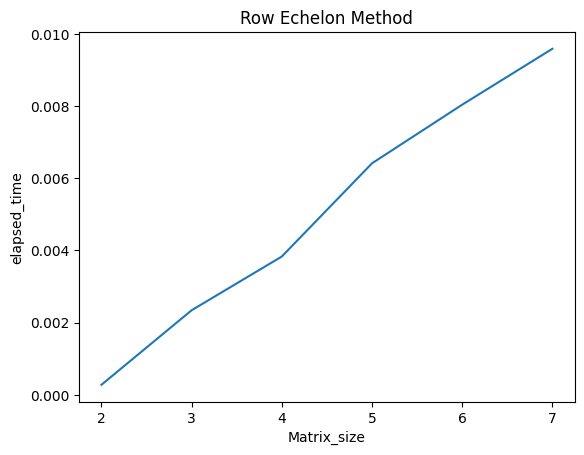

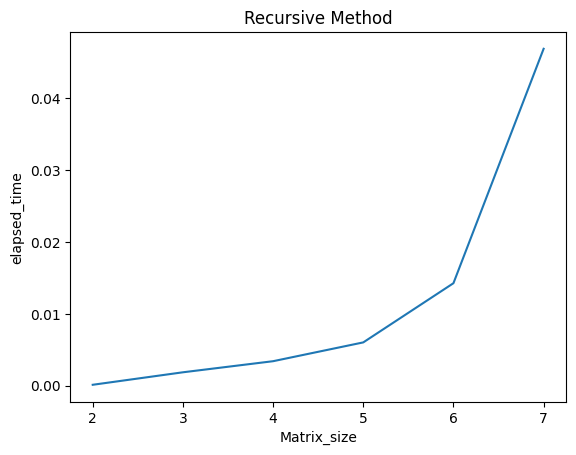


 So based on this comparison the Row Echelon Method is more efficient


In [799]:
# Plot the recorded data

x = [2, 3, 4, 5,6,7]

# Plot the data
plt.plot(x, elapsed_time_rowechelon)

# Add labels and title
plt.xlabel("Matrix_size")
plt.ylabel("elapsed_time")
plt.title("Row Echelon Method")

# Show the plot
plt.show()

x = [2, 3, 4, 5,6,7]

# Plot the data
plt.plot(x, elapsed_time_recursive)

# Add labels and title
plt.xlabel("Matrix_size")
plt.ylabel("elapsed_time")
plt.title("Recursive Method")

# Show the plot
print("\n")
plt.show()

print("\n So based on this comparison the Row Echelon Method is more efficient")

## 4. EXTRA - 2D and 3D plotting
In this part, you are demanded to solve two underdetermined systems of size N=2 and N=3 and plot the hyperplane of the results using matplotlib.
For example if a 2*2 system in underdetermined (has infinitely many solutions), the solution space is the span of a vector set consisting of one 2-dimentional vector, thus it can be plotted as a line in the 2D space.

Solving this part will provide you with extra points.

In [800]:
# Plot the solution set